import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = 'sua_chave_api_openweather'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# Colete os dados para uma localização específica
location = 'São Paulo'  # Exemplo de localização
data = get_weather_data(location)


In [32]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# Colete os dados para uma localização específica
location = 'Amazonas'  # Exemplo de localização
data = get_weather_data(location)


In [33]:
def process_weather_data(data):
    if data.get('cod') != 200:
        raise ValueError("Erro ao obter dados: {}".format(data.get('message')))
    
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h
    return {
        'Temperature': temp,
        'Humidity': humidity,
        'Wind Speed': wind_speed,
        'Precipitation': precipitation
    }

weather_info = process_weather_data(data)
df = pd.DataFrame([weather_info])


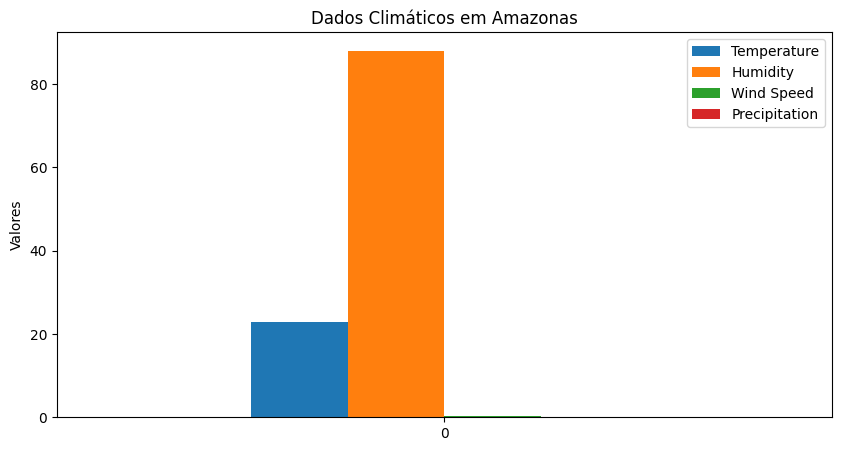

In [34]:
# Gráfico de Temperatura, Umidade, Velocidade do Vento e Precipitação
df.plot(kind='bar', figsize=(10, 5))
plt.title('Dados Climáticos em {}'.format(location))
plt.ylabel('Valores')
plt.xticks(rotation=0)
plt.show()


In [35]:
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Calcule o FWI e imprima
fwi = calculate_fwi(
    df['Temperature'].values[0],
    df['Humidity'].values[0],
    df['Wind Speed'].values[0],
    df['Precipitation'].values[0]
)

print("FWI:", fwi)
print("Risco de Queimadas:", "Alto" if fwi > 15 else "Baixo")


FWI: 0.27292122
Risco de Queimadas: Baixo


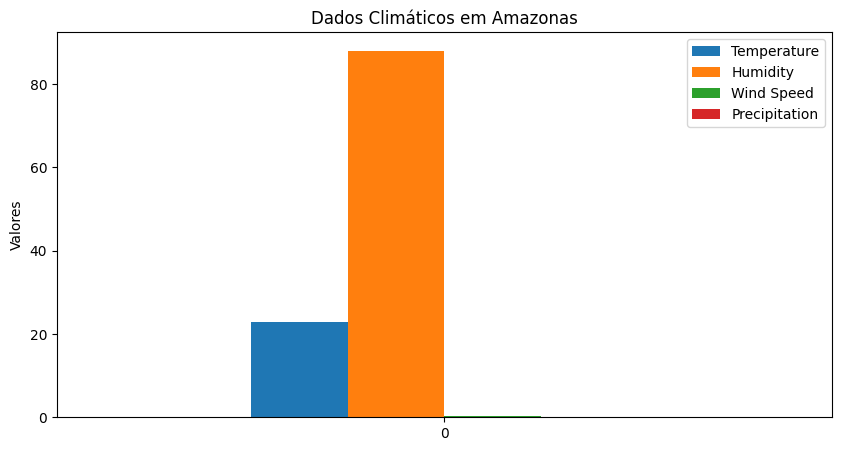

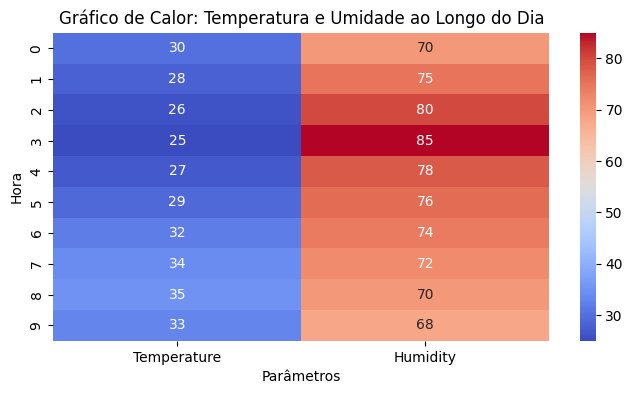

In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importando seaborn

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# Colete os dados para uma localização específica
location = 'Amazonas'  # Exemplo de localização
data = get_weather_data(location)

def process_weather_data(data):
    if data.get('cod') != 200:
        raise ValueError("Erro ao obter dados: {}".format(data.get('message')))
    
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h
    return {
        'Temperature': temp,
        'Humidity': humidity,
        'Wind Speed': wind_speed,
        'Precipitation': precipitation
    }

weather_info = process_weather_data(data)
df = pd.DataFrame([weather_info])

# Gráfico de Temperatura, Umidade, Velocidade do Vento e Precipitação
df.plot(kind='bar', figsize=(10, 5))
plt.title('Dados Climáticos em {}'.format(location))
plt.ylabel('Valores')
plt.xticks(rotation=0)
plt.show()

# Simulando múltiplos dados para o gráfico de calor
heatmap_data = pd.DataFrame({
    'Hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    'Temperature': [30, 28, 26, 25, 27, 29, 32, 34, 35, 33],
    'Humidity': [70, 75, 80, 85, 78, 76, 74, 72, 70, 68]
})

heatmap_data.set_index('Hour', inplace=True)

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Gráfico de Calor: Temperatura e Umidade ao Longo do Dia')
plt.xlabel('Parâmetros')
plt.ylabel('Hora')
plt.show()
